## Setup

In [1]:
# !git clone https://github.com/gsethi2409/tf-pose-estimation.git

In [2]:
%cd tf-pose-estimation/

/home/cameron/Documents/Other_Work/BASICS/Examples/POSE_EST/tf-pose-estimation


In [3]:
# !pip install -r requirements.txt

In [4]:
%cd tf_pose/pafprocess/

/home/cameron/Documents/Other_Work/BASICS/Examples/POSE_EST/tf-pose-estimation/tf_pose/pafprocess


In [5]:
# !pip install swig

In [6]:
!swig -python -c++ pafprocess.i && python3 setup.py build_ext --inplace

In [24]:
%cd ../../

/home/cameron/Documents/Other_Work/BASICS/Examples


In [23]:
# !pip install opencv-python
# !pip install tf-slim

In [15]:
# pause after folder configuration to place
# tf.compat.v1.disable_eager_execution()
# after the tensor flow import in the estimator.py file

In [19]:
!pwd

/home/cameron/Documents/Other_Work/BASICS/Examples/POSE_EST/tf-pose-estimation


# Demo 2D Pose evaluation

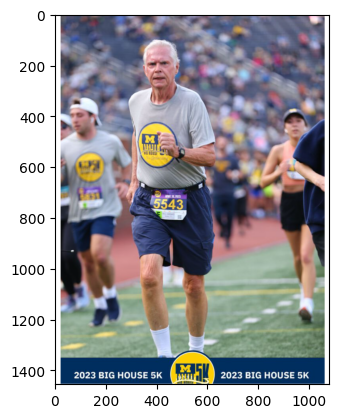

In [20]:
import sys
import time
import os

from tf_pose import common
import cv2
import numpy as np
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh
import math

import matplotlib.pyplot as plt
%matplotlib inline

model = "cmu"
image_file = "../media/dad_big_house.png"
image = common.read_imgfile(image_file, None, None)
  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

[2023-05-01 14:15:34,634] [TfPoseEstimator] [INFO] loading graph from /home/cameron/Documents/Other_Work/BASICS/Examples/POSE_EST/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=1080x1455)
2023-05-01 14:15:34,634 INFO loading graph from /home/cameron/Documents/Other_Work/BASICS/Examples/POSE_EST/tf-pose-estimation/models/graph/cmu/graph_opt.pb(default size=1080x1455)


Loading TensorFlow


2023-05-01 14:15:35.636201: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-01 14:15:35.825079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'upsample_size' with dtype int32 and shape [2]
	 [[{{node upsample_size}}]]
2023-05-01 14:15:35.827187: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'upsample_size' with dtype int32 and shape [2]
	 [[{{node upsample_size}}]]


TfPoseEstimator/Openpose/concat_stage7/axis
TfPoseEstimator/Mconv7_stage6_L2/biases
TfPoseEstimator/Mconv7_stage6_L2/weights
TfPoseEstimator/Mconv6_stage6_L2/biases
TfPoseEstimator/Mconv6_stage6_L2/weights
TfPoseEstimator/Mconv5_stage6_L2/biases
TfPoseEstimator/Mconv5_stage6_L2/weights
TfPoseEstimator/Mconv4_stage6_L2/biases
TfPoseEstimator/Mconv4_stage6_L2/weights
TfPoseEstimator/Mconv3_stage6_L2/biases
TfPoseEstimator/Mconv3_stage6_L2/weights
TfPoseEstimator/Mconv2_stage6_L2/biases
TfPoseEstimator/Mconv2_stage6_L2/weights
TfPoseEstimator/Mconv1_stage6_L2/biases
TfPoseEstimator/Mconv1_stage6_L2/weights
TfPoseEstimator/Mconv7_stage6_L1/biases
TfPoseEstimator/Mconv7_stage6_L1/weights
TfPoseEstimator/Mconv6_stage6_L1/biases
TfPoseEstimator/Mconv6_stage6_L1/weights
TfPoseEstimator/Mconv5_stage6_L1/biases
TfPoseEstimator/Mconv5_stage6_L1/weights
TfPoseEstimator/Mconv4_stage6_L1/biases
TfPoseEstimator/Mconv4_stage6_L1/weights
TfPoseEstimator/Mconv3_stage6_L1/biases
TfPoseEstimator/Mconv3_st

2023-05-01 14:15:35.997214: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-05-01 14:15:36.136175: W tensorflow/c/c_api.cc:300] Operation '{name:'smoothing/gauss_weight/Assign' id:492 op device:{requested: '', assigned: ''} def:{{{node smoothing/gauss_weight/Assign}} = AssignVariableOp[_has_manual_control_dependencies=true, dtype=DT_FLOAT, validate_shape=false](smoothing/gauss_weight, smoothing/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


inference started...
NUMBER OF PEOPLE  7


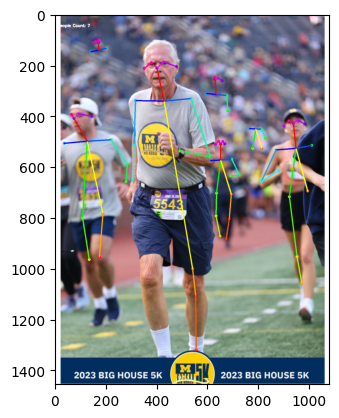

In [22]:
h, w, channels = image.shape

print("Loading TensorFlow")
if w == 0 or h == 0:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(432, 368))
else:
    e = TfPoseEstimator(get_graph_path('cmu'), target_size=(w, h))
    
    
experiments_dir = "_experiments"
if not os.path.exists(experiments_dir):
    os.makedirs(experiments_dir)

experiment_dir = time.strftime("%Y%m%d-%H%M%S")
out_dir = experiments_dir + experiment_dir
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

output_json = out_dir + "/json/"
if not os.path.exists(output_json):
    os.makedirs(output_json)

print('inference started...')
t = time.time()
people = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4.0)
count_people = len(people)
print("NUMBER OF PEOPLE ", count_people)
# image = TfPoseEstimator.draw_humans(image, people, imgcopy=False, output_json_dir=output_json ) 
image = TfPoseEstimator.draw_humans(image, people, imgcopy=False) 
cv2.putText(image,
            "People Count: %d" % (count_people),
            (10, 50),  cv2.FONT_HERSHEY_SIMPLEX, 0.5,
            (255, 255, 255), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()